# Income 

In [108]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [109]:
# load data
income = pd.read_excel('../data/landing/Table 2 - Total income distribution by geography, 2020-21.xlsx', sheet_name='Table 2.4', header=5)

In [110]:
# check data
income.head(5)

,Unnamed: 0,Unnamed: 1,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
0,SA2,SA2 NAME,(persons),years,$,$,$,ratio,ratio,ratio,ratio,coef.,%,%,%,%,%,%,%
1,Australia,NaN,"14,760,008",42,"1,040,901,408,310","54,890","70,522",5,1.88,0.38,0.14,0.483,9.8,22.5,33.4,25,25,25,25
2,New South Wales,NaN,"4,603,736",42,"341,107,484,589","55,854","74,094",5,1.9,0.38,0.15,0.497,11.2,24.3,35.2,24.6,24.6,24.7,26.1
3,101021007,Braidwood,"2,467",51,"169,986,703","46,640","68,904",6.84,2.05,0.3,0.07,0.615,21.2,32.6,42.7,31.8,24.3,21.7,22.2
4,101021008,Karabar,"5,103",42,"355,538,349","65,564","69,672",3.37,1.57,0.47,0.23,0.365,4.4,14.5,24.1,17.8,22.6,32.9,26.7


In [111]:
# select rows with NaN values
nan_rows = income[income.isnull().any(axis=1)]
nan_rows

,Unnamed: 0,Unnamed: 1,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,Australia,NaN,"14,760,008",42,"1,040,901,408,310","54,890","70,522",5,1.88,0.38,0.14,0.483,9.8,22.5,33.4,25,25,25,25
2,New South Wales,NaN,"4,603,736",42,"341,107,484,589","55,854","74,094",5,1.9,0.38,0.15,0.497,11.2,24.3,35.2,24.6,24.6,24.7,26.1
645,Victoria,NaN,"3,785,505",41,"263,825,637,886","54,008","69,694",4.96,1.88,0.38,0.15,0.483,9.8,22.5,33.5,25.3,25.4,24.9,24.3
1168,Queensland,NaN,"2,973,998",42,"198,422,040,159","53,643","66,719",4.84,1.85,0.38,0.15,0.467,8.4,20.6,31.6,25,26.1,25.4,23.4
1715,South Australia,NaN,"1,009,121",43,"64,181,556,748","52,767","63,601",4.54,1.77,0.39,0.15,0.454,8,20.1,30.7,25.1,26.9,27.1,20.9
1890,Western Australia,NaN,"1,585,093",42,"120,273,967,595","58,591","75,878",5.19,1.93,0.37,0.15,0.482,9.5,21.9,32.9,23.9,23.2,23.8,29.1
2156,Tasmania,NaN,"312,904",44,"18,621,588,011","50,130","59,512",4.69,1.77,0.38,0.14,0.451,7.5,19.5,30.1,26.6,28.1,26.6,18.6
2256,Northern Territory,NaN,"126,071",39,"9,391,280,690","65,906","74,492",3.91,1.67,0.43,0.2,0.406,6,16.9,27.1,19,21.6,29.4,29.9
2325,Australian Capital Territory,NaN,"290,512",40,"24,113,287,925","71,093","83,003",3.85,1.66,0.43,0.21,0.419,6.9,18.6,28.9,17.4,20.4,27.1,35.1
2460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# select all rows between 645 and 1168
income = income.iloc[646:1168] 

In [113]:
# rename columns Unnamed: 0 to SA2 code, and Unnamed: 1 to SA2 name
income.rename(columns={'Unnamed: 0': 'SA2 code', 'Unnamed: 1': 'SA2 name'}, inplace=True)

In [114]:
# filter data to only include rows with SA2 code that starts with 206, 207, 208, 209, 210, 211, 212, 213, 214 (Melbourne SA2)
income = income[income['SA2 code'].astype(str).str.startswith(('206', '207', '208', '209', '210', '211', '212', '213', '214'))]

In [115]:
# check data
income.head(5)

,SA2 code,SA2 name,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
757,206011106,Brunswick East,"8,921",34,"703,845,159","67,960","78,898",4.21,1.71,0.41,0.2,0.418,6,17.4,28,19.3,21,25.9,33.8
758,206011107,Brunswick West,"9,353",36,"686,471,144","60,171","73,396",4.6,1.83,0.4,0.18,0.445,6.7,19,29.9,22.1,23.9,25.3,28.7
759,206011109,Pascoe Vale South,"6,331",43,"489,833,696","63,813","77,371",4.57,1.85,0.4,0.18,0.439,5.9,17.9,29,20.6,23.1,24.6,31.7
760,206011495,Brunswick - North,"8,740",35,"661,294,326","61,510","75,663",4.59,1.84,0.4,0.19,0.445,6.9,18.9,29.8,21.5,23.2,24.7,30.5
761,206011496,Brunswick - South,"9,323",34,"731,086,364","66,877","78,418",4.39,1.73,0.39,0.18,0.438,6.8,18.5,29.2,20.1,21.4,25.5,33.1


In [116]:
# check null values
income.isnull().sum()

SA2 code                 0
SA2 name                 0
Earners                  0
Median age of earners    0
Sum                      0
Median                   0
Mean                     0
P80/P20                  0
P80/P50                  0
P20/P50                  0
P10/P50                  0
Gini coefficient         0
Top 1%                   0
Top 5%                   0
Top 10%                  0
Lowest Quartile          0
Second Quartile          0
Third Quartile           0
Highest Quartile         0
dtype: int64

In [117]:
# check for essendon airport
income[income['SA2 name'].str.contains('Essendon Airport')] 


,SA2 code,SA2 name,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
907,210011227,Essendon Airport,np,np,np,np,np,np,np,np,np,np,np,np,np,np,np,np,np


In [118]:
# drop row 907 for Essendon Airport
income = income.drop([907])

In [123]:
# Sort the data by 'Median' income and select the top 10 SA2 regions
top_10 = income.sort_values(by='Median', ascending=False).head(10)

/var/folders/gf/ml3nsztn0cb376sq34z0ll1r0000gn/T/ipykernel_49038/392015522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Median', y='SA2 name', data=top_10, palette='viridis')


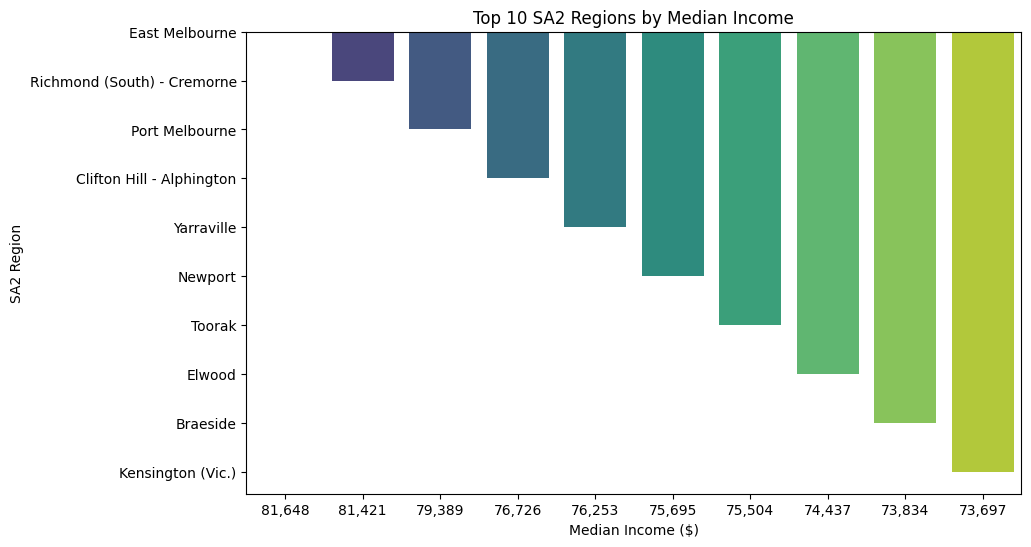

In [122]:
# plot the top 10 SA2 regions by median income
plt.figure(figsize=(10, 6))
sns.barplot(x='Median', y='SA2 name', data=top_10, palette='viridis')
plt.xlabel('Median Income ($)')
plt.ylabel('SA2 Region')
plt.title('Top 10 SA2 Regions by Median Income')
plt.show()